In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('course_project_train.csv')
data_test = pd.read_csv('course_project_test.csv')
data_test.shape

(2500, 16)

**Загружаем и просматриваем данные**

In [3]:
data.shape

(7500, 17)

In [4]:
data.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
data['index'] = pd.Series(range(0, data.shape[0]))
data_test['index'] = pd.Series(range(0, data_test.shape[0]))

In [6]:
data_test.shape

(2500, 17)

In [7]:
data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733,3749.500000
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874,2165.207842
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000,1874.750000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,3749.500000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000,5624.250000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,7499.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

**Перевод классовых переменых в числовые для работы IterativeImputer в последствии**

In [9]:
data['Home Ownership'].unique()
#не будем переводить в числовую

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

(array([ 647.,    0.,    0., 3637.,    0.,    0., 3204.,    0.,    0.,
          12.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

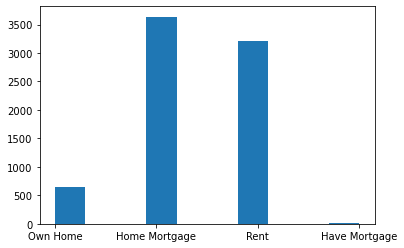

In [10]:
plt.hist(data['Home Ownership'])

In [11]:
data_Home_Ownership = pd.get_dummies(data[['Home Ownership', 'index']])
data_test_Home_Ownership = pd.get_dummies(data_test[['Home Ownership', 'index']])

In [12]:
data_Home_Ownership.head()

,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,0,0,0,1,0
1,1,0,0,1,0
2,2,0,1,0,0
3,3,0,0,1,0
4,4,0,0,0,1


In [13]:
data = data.drop('Home Ownership', axis=1) \
    .merge(data_Home_Ownership, how='outer', on='index')

data_test = data_test.drop('Home Ownership', axis=1) \
    .merge(data_test_Home_Ownership, how='outer', on='index')
data_test.shape

(2500, 20)

In [14]:
list(data)

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default',
 'index',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent']

In [15]:
data['Years in current job'].unique()
data_test.shape

(2500, 20)

In [16]:
data = data.replace({'Years in current job':{'10+ years':10,'9 years':9 , '8 years':8, '7 years':7, \
                                             '6 years': 6, '5 years': 5, '4 years': 4, '3 years': 3, \
                                             '2 years': 2, '1 year': 1 , '< 1 year': 0}})

data_test = data_test.replace({'Years in current job':{'10+ years':10,'9 years':9 , '8 years':8, '7 years':7, \
                                             '6 years': 6, '5 years': 5, '4 years': 4, '3 years': 3, \
                                             '2 years': 2, '1 year': 1 , '< 1 year': 0}})

In [17]:
data['Years in current job'].unique()

array([nan, 10.,  8.,  6.,  7.,  5.,  1.,  0.,  4.,  3.,  2.,  9.])

In [18]:
data_test.shape

(2500, 20)

In [19]:
data['Purpose'].unique()
#не будем ее трогать

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [20]:
term_data = pd.get_dummies(data['Term']).drop('Short Term', axis=1)
term_data_test = pd.get_dummies(data_test['Term']).drop('Short Term', axis=1)

In [21]:
term_data.head()

,Long Term
0,0
1,1
2,0
3,0
4,0


In [22]:
data['Term'] = term_data[['Long Term']]
data_test['Term'] = term_data_test[['Long Term']]

In [23]:
data.head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,...,99999999.0,47386.0,7914.0,749.0,0,0,0,0,1,0
1,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,...,264968.0,394972.0,18373.0,737.0,1,1,0,0,1,0
2,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,...,99999999.0,308389.0,13651.0,742.0,0,2,0,1,0,0
3,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,...,121396.0,95855.0,11338.0,694.0,0,3,0,0,1,0
4,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,...,125840.0,93309.0,7180.0,719.0,0,4,0,0,0,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 5943 non-null   float64
 1   Years in current job          7129 non-null   float64
 2   Tax Liens                     7500 non-null   float64
 3   Number of Open Accounts       7500 non-null   float64
 4   Years of Credit History       7500 non-null   float64
 5   Maximum Open Credit           7500 non-null   float64
 6   Number of Credit Problems     7500 non-null   float64
 7   Months since last delinquent  3419 non-null   float64
 8   Bankruptcies                  7486 non-null   float64
 9   Purpose                       7500 non-null   object 
 10  Term                          7500 non-null   uint8  
 11  Current Loan Amount           7500 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

**Обработаем выбросы**

**ищем колонки с выбросами визульнно по полям min 25 50 75 max**

In [25]:
data.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
count,5.943000e+03,7129.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.366392e+06,5.880348,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,0.259200,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733,3749.500000,0.001600,0.484933,0.086267,0.427200
std,8.453392e+05,3.620092,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,0.438225,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874,2165.207842,0.039971,0.499806,0.280776,0.494705
min,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.443410e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000,1874.750000,0.000000,0.000000,0.000000,0.000000
50%,1.168386e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,3749.500000,0.000000,0.000000,0.000000,0.000000
75%,1.640137e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,1.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000,5624.250000,0.000000,1.000000,0.000000,1.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,7499.000000,1.000000,1.000000,1.000000,1.000000


**Выделю подозрительные столбцы и построю график для визуализации и нахождения выбросов**

In [26]:
# Tax Liens   Number of Open Accounts  Maximum Open Credit    Number of Credit Problems    

In [27]:
#Months since last delinquent   Bankruptcies  Current Loan Amount  Current Credit Balance     Monthly Debt

In [28]:
# Credit Score

**построил графики для всех подозрительных параметров, 
в финальной работе оставил только те где действительно нашлись выбросы**

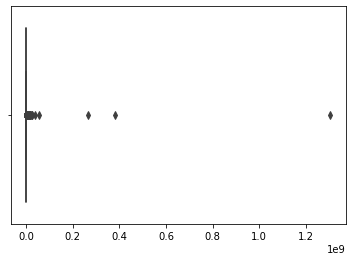

In [29]:
# Maximum Open Credit
sns.boxplot(x=data[['Maximum Open Credit']])

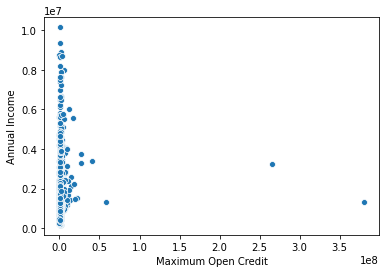

In [30]:
sns.scatterplot(data=data, x='Maximum Open Credit', y='Annual Income')

In [31]:
data.sort_values(by='Maximum Open Credit', ascending=False).head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
617,NaN,3.0,0.0,13.0,27.5,1.304726e+09,0.0,NaN,0.0,debt consolidation,...,529892.0,1126814.0,5492.0,NaN,0,617,0,1,0,0
44,1334256.0,10.0,0.0,17.0,15.4,3.800523e+08,1.0,35.0,0.0,take a trip,...,33110.0,656450.0,34357.0,729.0,0,44,1,0,0,0
2617,3217802.0,10.0,0.0,12.0,35.5,2.655129e+08,0.0,NaN,0.0,other,...,50116.0,1834450.0,20272.0,750.0,0,2617,0,1,0,0
2023,1342825.0,10.0,0.0,12.0,16.3,5.756256e+07,0.0,NaN,0.0,other,...,166826.0,944547.0,9176.0,749.0,0,2023,0,0,0,1
2763,3377440.0,10.0,0.0,11.0,23.2,4.092389e+07,0.0,59.0,0.0,home improvements,...,99999999.0,1908550.0,5770.0,743.0,0,2763,0,1,0,0


In [32]:
data['Maximum Open Credit'].loc[data['Maximum Open Credit'] > 1e+08] = 5.756256e+07

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
data.sort_values(by='Maximum Open Credit', ascending=False).head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
617,NaN,3.0,0.0,13.0,27.5,57562560.0,0.0,NaN,0.0,debt consolidation,...,529892.0,1126814.0,5492.0,NaN,0,617,0,1,0,0
44,1334256.0,10.0,0.0,17.0,15.4,57562560.0,1.0,35.0,0.0,take a trip,...,33110.0,656450.0,34357.0,729.0,0,44,1,0,0,0
2617,3217802.0,10.0,0.0,12.0,35.5,57562560.0,0.0,NaN,0.0,other,...,50116.0,1834450.0,20272.0,750.0,0,2617,0,1,0,0
2023,1342825.0,10.0,0.0,12.0,16.3,57562560.0,0.0,NaN,0.0,other,...,166826.0,944547.0,9176.0,749.0,0,2023,0,0,0,1
2763,3377440.0,10.0,0.0,11.0,23.2,40923894.0,0.0,59.0,0.0,home improvements,...,99999999.0,1908550.0,5770.0,743.0,0,2763,0,1,0,0


In [34]:
#'Months since last delinquent'

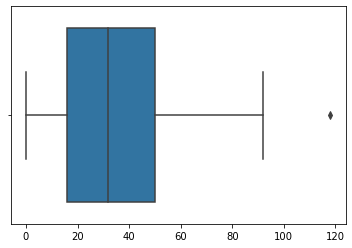

In [35]:
sns.boxplot(x=data[['Months since last delinquent']])

In [36]:
data['Months since last delinquent'].loc[data['Months since last delinquent'] > 100] = 50

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


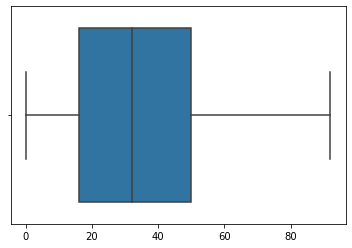

In [37]:
sns.boxplot(x=data[['Months since last delinquent']])

In [38]:
data.shape

(7500, 21)

In [39]:
#Current Loan Amount  

In [40]:
data.sort_values(by='Current Loan Amount', ascending=False).head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,...,99999999.0,47386.0,7914.0,749.0,0,0,0,0,1,0
4471,651833.0,3.0,0.0,7.0,13.5,418638.0,0.0,NaN,0.0,home improvements,...,99999999.0,97983.0,13145.0,740.0,0,4471,0,0,1,0
6646,912000.0,2.0,0.0,21.0,19.4,1663046.0,0.0,NaN,0.0,other,...,99999999.0,113468.0,18620.0,744.0,0,6646,0,0,0,1
4384,2802671.0,8.0,0.0,30.0,36.1,1297802.0,0.0,21.0,0.0,educational expenses,...,99999999.0,574997.0,46711.0,646.0,0,4384,0,1,0,0
4388,2103376.0,8.0,0.0,8.0,17.5,949410.0,0.0,53.0,0.0,debt consolidation,...,99999999.0,586264.0,19456.0,734.0,0,4388,0,0,0,1


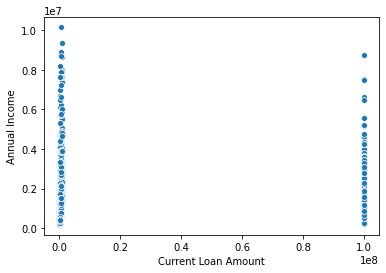

In [41]:
sns.scatterplot(data=data, x='Current Loan Amount', y='Annual Income')

In [42]:
data_curr_loan = data.loc[data['Current Loan Amount'] < 90000000]

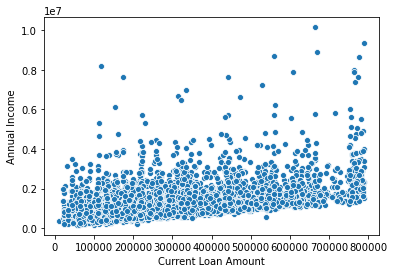

In [43]:
sns.scatterplot(data=data_curr_loan, x='Current Loan Amount', y='Annual Income')

In [44]:
data['Current Loan Amount'].loc[ \
        data['Current Loan Amount'] > 90000000] = float('NaN')
data_test['Current Loan Amount'].loc[ \
        data_test['Current Loan Amount'] > 90000000] = float('NaN')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 5943 non-null   float64
 1   Years in current job          7129 non-null   float64
 2   Tax Liens                     7500 non-null   float64
 3   Number of Open Accounts       7500 non-null   float64
 4   Years of Credit History       7500 non-null   float64
 5   Maximum Open Credit           7500 non-null   float64
 6   Number of Credit Problems     7500 non-null   float64
 7   Months since last delinquent  3419 non-null   float64
 8   Bankruptcies                  7486 non-null   float64
 9   Purpose                       7500 non-null   object 
 10  Term                          7500 non-null   uint8  
 11  Current Loan Amount           6630 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

In [46]:
# Current Credit Balance     

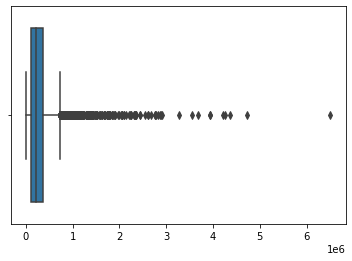

In [47]:
sns.boxplot(data[['Current Credit Balance']])

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([      0. ,  650679.7, 1301359.4, 1952039.1, 2602718.8, 3253398.5,
        3904078.2, 4554757.9, 5205437.6, 5856117.3, 6506797. ]),
 <a list of 7500 Lists of Patches objects>)

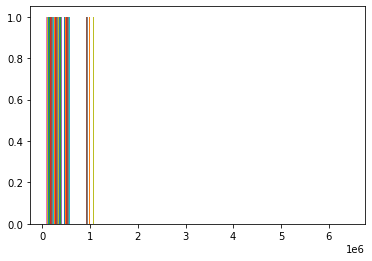

In [48]:
plt.hist(data[['Current Credit Balance']])

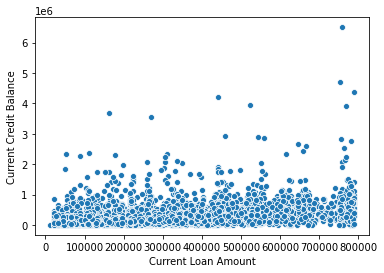

In [49]:
sns.scatterplot(data=data, x='Current Loan Amount', y='Current Credit Balance')

In [50]:
data.sort_values(by='Current Credit Balance', ascending=False).head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
4769,3739960.0,9.0,0.0,7.0,22.8,26343328.0,0.0,NaN,0.0,home improvements,...,757834.0,6506797.0,38023.0,703.0,0,4769,0,1,0,0
4745,6029954.0,4.0,0.0,30.0,17.5,11603856.0,0.0,NaN,0.0,debt consolidation,...,753588.0,4720132.0,136679.0,745.0,0,4745,0,0,1,0
4602,3990038.0,10.0,0.0,10.0,23.0,9541136.0,0.0,5.0,0.0,home improvements,...,788788.0,4367245.0,29792.0,687.0,0,4602,0,1,0,0
1580,3783660.0,1.0,0.0,9.0,17.0,7204516.0,0.0,NaN,0.0,debt consolidation,...,NaN,4249673.0,42251.0,739.0,0,1580,0,1,0,0
7278,2418415.0,NaN,0.0,13.0,14.0,7453138.0,0.0,45.0,0.0,debt consolidation,...,440088.0,4209659.0,29626.0,714.0,0,7278,0,0,1,0


In [51]:
#у записи 4769, Term-выплаты короткий и Monthly Debt довольно маленький значит Current Credit Balance не соответствует(явно выброс)

In [52]:
data['Current Credit Balance'].loc[ \
    data['Current Credit Balance'] > 6000000] \
    = data['Current Credit Balance'].mean()

data_test['Current Credit Balance'].loc[ \
    data_test['Current Credit Balance'] > 6000000] \
    = data_test['Current Credit Balance'].mean()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


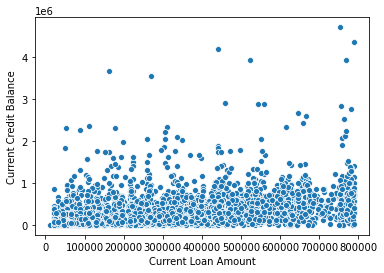

In [53]:
sns.scatterplot(data=data, x='Current Loan Amount', y='Current Credit Balance')

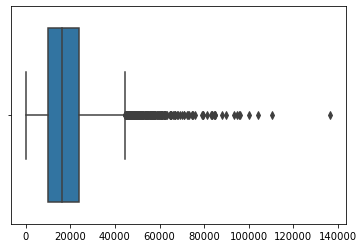

In [54]:
sns.boxplot(data[['Monthly Debt']])

In [55]:
data.sort_values(by='Monthly Debt', ascending=False).head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,index,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
4745,6029954.0,4.0,0.0,30.0,17.5,11603856.0,0.0,NaN,0.0,debt consolidation,...,753588.0,4720132.0,136679.0,745.0,0,4745,0,0,1,0
1615,6651900.0,10.0,0.0,13.0,25.1,2155868.0,0.0,NaN,0.0,debt consolidation,...,314380.0,1623569.0,110311.0,719.0,0,1615,0,0,1,0
2535,4120226.0,10.0,0.0,15.0,13.0,3931620.0,0.0,NaN,0.0,debt consolidation,...,542146.0,2889577.0,104036.0,656.0,1,2535,0,1,0,0
6946,6492395.0,1.0,0.0,19.0,26.0,1406526.0,0.0,NaN,0.0,other,...,322190.0,1169773.0,100091.0,707.0,0,6946,0,0,1,0
6253,NaN,4.0,0.0,12.0,16.5,828872.0,0.0,14.0,0.0,debt consolidation,...,570262.0,589855.0,96177.0,NaN,0,6253,0,0,0,1


In [56]:
#самые большие monthly debt соответствут и большим кредитам а значит довольно правдоподобны(не выброс)

**Заполнение NULL значений с помошью линейной регрессии на основе других колонок**

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 5943 non-null   float64
 1   Years in current job          7129 non-null   float64
 2   Tax Liens                     7500 non-null   float64
 3   Number of Open Accounts       7500 non-null   float64
 4   Years of Credit History       7500 non-null   float64
 5   Maximum Open Credit           7500 non-null   float64
 6   Number of Credit Problems     7500 non-null   float64
 7   Months since last delinquent  3419 non-null   float64
 8   Bankruptcies                  7486 non-null   float64
 9   Purpose                       7500 non-null   object 
 10  Term                          7500 non-null   uint8  
 11  Current Loan Amount           6630 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

In [58]:
import sklearn 
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

iterimp = IterativeImputer(estimator=LinearRegression(), random_state=100)
data_test.shape

(2500, 20)

In [59]:
data_full = pd.DataFrame(iterimp.fit_transform(data.drop('Purpose', axis=1)))
data_test_full = pd.DataFrame(iterimp.fit_transform(data_test.drop('Purpose', axis=1)))
data_test.shape

(2500, 20)

In [61]:
data_test_full.shape

(2500, 19)

**проверяем если замена через линейную регресию прошла успешно сравнивая среднее mean** 

In [62]:
data.mean()

Annual Income                   1.366392e+06
Years in current job            5.880348e+00
Tax Liens                       3.013333e-02
Number of Open Accounts         1.113093e+01
Years of Credit History         1.831747e+01
Maximum Open Credit             7.081399e+05
Number of Credit Problems       1.700000e-01
Months since last delinquent    3.467271e+01
Bankruptcies                    1.171520e-01
Term                            2.592000e-01
Current Loan Amount             3.090244e+05
Current Credit Balance          2.890043e+05
Monthly Debt                    1.831445e+04
Credit Score                    1.151087e+03
Credit Default                  2.817333e-01
index                           3.749500e+03
Home Ownership_Have Mortgage    1.600000e-03
Home Ownership_Home Mortgage    4.849333e-01
Home Ownership_Own Home         8.626667e-02
Home Ownership_Rent             4.272000e-01
dtype: float64

In [63]:
data_full.mean()

0     1.363116e+06
1     5.902354e+00
2     3.013333e-02
3     1.113093e+01
4     1.831747e+01
5     7.081399e+05
6     1.700000e-01
7     3.502117e+01
8     1.169120e-01
9     2.592000e-01
10    3.074517e+05
11    2.890043e+05
12    1.831445e+04
13    1.175968e+03
14    2.817333e-01
15    3.749500e+03
16    1.600000e-03
17    4.849333e-01
18    8.626667e-02
19    4.272000e-01
dtype: float64

In [64]:
# средние отличаеться довольно незначительно на нужных нам колонках(0,1,7,8,10,13) так что будем считать замену успешной

In [65]:
data['Annual Income'] = data_full[0]
data['Years in current job'] = data_full[1]
data['Months since last delinquent'] = data_full[7]
data['Bankruptcies'] = data_full[8]
data['Current Loan Amount'] = data_full[10]
data['Credit Score'] = data_full[13]


data_test['Annual Income'] = data_test_full[0]
data_test['Years in current job'] = data_test_full[1]
data_test['Months since last delinquent'] = data_test_full[7]
data_test['Bankruptcies'] = data_test_full[8]
data_test['Current Loan Amount'] = data_test_full[10]
data_test['Credit Score'] = data_test_full[13]


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Annual Income                 7500 non-null   float64
 1   Years in current job          7500 non-null   float64
 2   Tax Liens                     7500 non-null   float64
 3   Number of Open Accounts       7500 non-null   float64
 4   Years of Credit History       7500 non-null   float64
 5   Maximum Open Credit           7500 non-null   float64
 6   Number of Credit Problems     7500 non-null   float64
 7   Months since last delinquent  7500 non-null   float64
 8   Bankruptcies                  7500 non-null   float64
 9   Purpose                       7500 non-null   object 
 10  Term                          7500 non-null   uint8  
 11  Current Loan Amount           7500 non-null   float64
 12  Current Credit Balance        7500 non-null   float64
 13  Mon

**Анализ данных отбор признаков и построение новых признаков**

In [67]:
corr_matrix = data.corr()
corr_matrix
corr_matrix["Credit Default"].sort_values(ascending=False)

Credit Default                  1.000000
Credit Score                    0.490217
Term                            0.181487
Current Loan Amount             0.068224
Home Ownership_Rent             0.060114
Number of Open Accounts         0.028884
Tax Liens                       0.024368
Number of Credit Problems       0.020088
Monthly Debt                    0.018480
index                           0.012858
Home Ownership_Own Home         0.010260
Bankruptcies                    0.001579
Years in current job           -0.003658
Months since last delinquent   -0.005538
Home Ownership_Have Mortgage   -0.010240
Current Credit Balance         -0.018363
Years of Credit History        -0.020567
Maximum Open Credit            -0.047248
Home Ownership_Home Mortgage   -0.064445
Annual Income                  -0.101504
Name: Credit Default, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a831b80>,
      dtype=object)

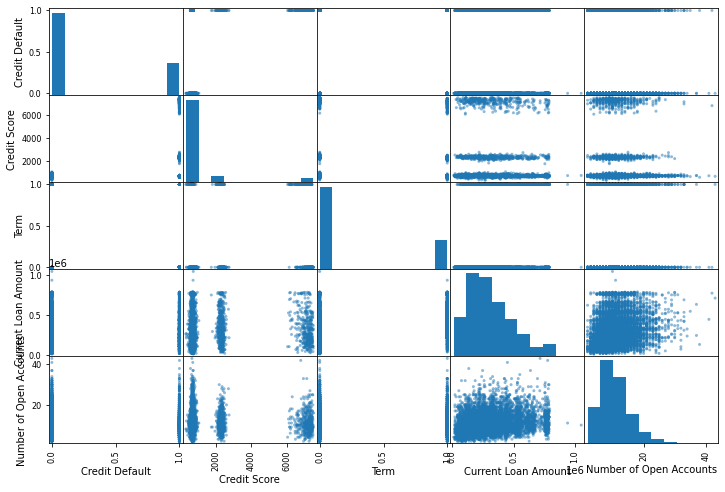

In [68]:
from pandas.plotting import scatter_matrix
attributes=["Credit Default","Credit Score","Term","Current Loan Amount", 'Number of Open Accounts']
scatter_matrix(data[attributes],figsize=(12,8))

**Попробуем создать сильные Фичи**

In [69]:
data['paid_part'] = data['Current Credit Balance'] / data['Current Loan Amount']


data_test['paid_part'] = data_test['Current Credit Balance'] / data_test['Current Loan Amount']

In [70]:
data['must_pay'] = data['Tax Liens'] + data['Monthly Debt']

data_test['must_pay'] = data_test['Tax Liens'] + data_test['Monthly Debt']

In [71]:
list(data)

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default',
 'index',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'paid_part',
 'must_pay']

In [72]:
corr_matrix = data.corr()
corr_matrix
corr_matrix["Credit Default"].sort_values(ascending=False)

Credit Default                  1.000000
Credit Score                    0.490217
Term                            0.181487
Current Loan Amount             0.068224
Home Ownership_Rent             0.060114
Number of Open Accounts         0.028884
Tax Liens                       0.024368
Number of Credit Problems       0.020088
must_pay                        0.018480
Monthly Debt                    0.018480
index                           0.012858
Home Ownership_Own Home         0.010260
Bankruptcies                    0.001579
Years in current job           -0.003658
Months since last delinquent   -0.005538
Home Ownership_Have Mortgage   -0.010240
Current Credit Balance         -0.018363
Years of Credit History        -0.020567
paid_part                      -0.037352
Maximum Open Credit            -0.047248
Home Ownership_Home Mortgage   -0.064445
Annual Income                  -0.101504
Name: Credit Default, dtype: float64

In [73]:
data = data.drop(['index', 'Purpose'], axis=1)

X_final_test = data_test.drop(['index', 'Purpose'], axis=1)

In [74]:
#Выгрузим данные

In [75]:
data.to_csv('data_proccessed.csv')

data_test.to_csv('data_test_proccessed.csv')
data_test.shape

(2500, 22)

**создаем тестовые и тренировочные датасеты**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = data.drop(['Credit Default'], axis=1)
y = data[['Credit Default']]
X_train, X_test, y_train, y_test = train_test_split( \
    X, y, test_size=0.30,random_state=42)

**Для балансировки классов я вычитал в интернете метод SMOTE.**
**Данный алгоритм делает oversampling но не дублирует данные а добавляет похожие.**
**(Synthetic Minority Oversampling Technique)**

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (sampling_strategy = 0.9,
    random_state=0,
    k_neighbors=4)

In [79]:
X_train.shape

(5250, 20)

In [80]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [81]:
X_train_res.shape

(7210, 20)

In [82]:
y_train.loc[y_train['Credit Default'] == 1].shape

(1455, 1)

In [83]:
y_train_res.loc[y_train_res['Credit Default'] == 1].shape

(3415, 1)

**Импортируем catboost и тюним**

In [84]:
from catboost import CatBoostClassifier

In [85]:
clf = CatBoostClassifier()

In [1]:
clf.fit(X_train_res, y_train_res)

In [87]:
from sklearn.metrics import f1_score

In [88]:
y_predicted = clf.predict(X_test)

In [89]:
f1_score(y_test, y_predicted)

0.6920980926430518

**После долгого перебора параметров через gridsearch и randomsearch
    лучший результат показала модель с стандартными параметрами**

In [90]:
y_final_pred = clf.predict(X_final_test)

In [91]:
y_final_pred = pd.DataFrame(y_final_pred)

In [92]:
y_final_pred['index'] = data_test[['index']]

In [93]:
y_final_pred.head()

,0,index
0,1,0
1,0,1
2,1,2
3,0,3
4,0,4


In [94]:
y_final_pred.to_csv('y_pred')

In [95]:
y_final_pred.shape

(2500, 2)

In [98]:
y_pred_se = pd.read_csv('y_pred')

In [99]:
y_pred_se.shape

(2500, 3)